In [1]:
import numpy as np
import obspy
import loading_streams
import variables
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
from obspy.signal.trigger import coincidence_trigger
import matplotlib.pyplot as plt


import event_processing


In [2]:
station_list = statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']
day = 15
test_paths = variables.make_geophone_data_paths(station_list,15)



In [3]:
day_test = loading_streams.get_raw_stream(test_paths)

In [4]:
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600

In [5]:
data = day_test.slice(starttime=start_time,endtime=end_time)

In [6]:
waveforms = [w.data for w in data]
times = [t.times() for t in data]
times_mat = [t.times('matplotlib') for t in data]
times_stamp = [t.times('timestamp') for t in data]

In [7]:
stream_filt = data.filter('highpass', corners=4, freq=80, zerophase=False)
stream_2 = stream_filt.copy()
#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.2, lta=4)
#events = coincidence_trigger("classicstalta", 10, 0.5, stream_2, 3, sta=0.08, lta=1)
#events = coincidence_trigger("classicstalta", 5, 0.5, stream_2, 3, sta=0.08, lta=1)
#events = coincidence_trigger("classicstalta", 5, 0.5, stream_2, 3, sta=0.08, lta=0.5) #best as of 08/24/2022 at 12:41
#events = coincidence_trigger("classicstalta", 5, 0.4, stream_2, 3, sta=0.08, lta=0.5)  # also good 08/24/2022 at 12:49
#events = coincidence_trigger("classicstalta", 5, 0.6, stream_2, 3, sta=0.08, lta=0.5) # also good 08/24/2022 at 12:52
#events = coincidence_trigger("classicstalta", 5, 0.7, stream_2, 3, sta=0.08, lta=0.5) # also good 08/24/2022 at 12:57
#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.08, lta=0.5)  # also good 08/24/2022 at 13:00

#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.06, lta=0.5) # very good
#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.04, lta=0.3) # even better
events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.02, lta=0.2)




#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.08, lta=0.5)
events = pd.DataFrame(events)

In [8]:
df_time = events.time
df_duration = events.duration
ct_stations = events.stations
ct_sum = events.coincidence_sum
#df_time[1].timestamp

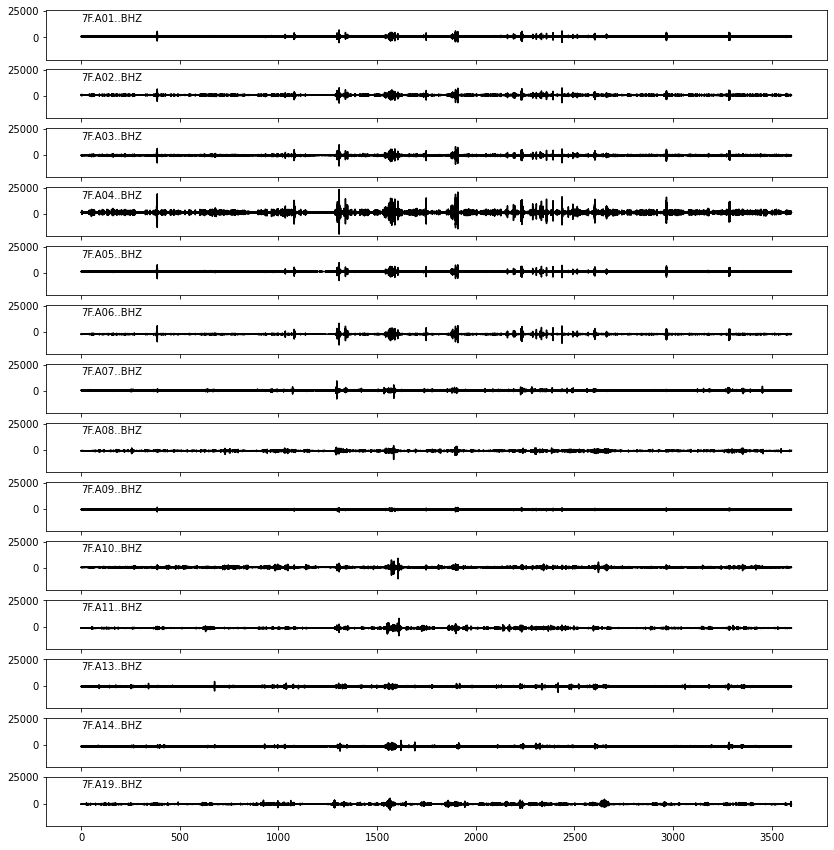

In [9]:
axes_id = dict(np.array([['7F.A01..BHZ' ,'7F.A02..BHZ' , '7F.A03..BHZ' , '7F.A04..BHZ' , '7F.A05..BHZ' , '7F.A06..BHZ' , '7F.A07..BHZ' , '7F.A08..BHZ' , '7F.A09..BHZ'  , '7F.A10..BHZ' , '7F.A11..BHZ', '7F.A13..BHZ', '7F.A14..BHZ', '7F.A19..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())
#axes_id = dict(np.array([['7F.B01..BHZ' ,'7F.B02..BHZ' , '7F.B03..BHZ' , '7F.B04..BHZ' , '7F.B06..BHZ' , '7F.B07..BHZ' , '7F.B08..BHZ' , '7F.B09..BHZ'  , '7F.B10..BHZ' , '7F.B11..BHZ', '7F.B12..BHZ' , '7F.B13..BHZ', '7F.B19..BHZ', '7F.B20..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())

#axes_id = dict(np.array([['7F.B01..BHZ' ,'7F.B02..BHZ' , '7F.B03..BHZ' , '7F.B04..BHZ' , '7F.B06..BHZ' , '7F.B07..BHZ' , '7F.B08..BHZ' , '7F.B09..BHZ'  , '7F.B10..BHZ' , '7F.B11..BHZ', '7F.B12..BHZ' ,'7F.B13..BHZ','7F.B19..BHZ' '7F.B20..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())


fig, ax = plt.subplots(len(data), figsize=(len(data), 15), sharex=True, sharey=True)

#fig.text(s='duration (s) = '+str(events.duration), x=0.5, y=0.85, fontsize=15)
#fig.text(s='coincidence sum = '+str(events.coincidence_sum), x=0.5, y=0.69, fontsize=15)
#fig.text(s='starttime = '+str(start_time), x=0.35, y=0.525, fontsize=15)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for i in np.arange(0, len(data), 1):
    # plot waveform
    ax[i].plot(times_stamp[i]-times_stamp[0][0], waveforms[i], color='black')

    # plot geophone name
    ax[i].text(1, 15000, list(axes_id.keys())[i])

In [ ]:
test_1 = loading_streams.import_data_for_single_day(test_paths)

In [ ]:
test_path[0].split('/')[-1].split('.')[-1]

In [ ]:
test_path[0].split('/')[-1].split('.')[0]